In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Collect validation set


In [ ]:
import pandas as pd

from datasets import load_dataset
from agent_search.parse import extract_boxed

In [ ]:
math_dset = load_dataset("hendrycks/competition_math", split="test")
math_dset

Dataset({
    features: ['problem', 'level', 'type', 'solution'],
    num_rows: 5000
})

In [ ]:
math_df = pd.DataFrame(math_dset)
math_df

,problem,level,type,solution
0,How many vertical asymptotes does the graph of...,Level 3,Algebra,The denominator of the rational function facto...
1,What is the positive difference between $120\%...,Level 1,Algebra,One hundred twenty percent of 30 is $120\cdot3...
2,Find $x$ such that $\lceil x \rceil + x = \dfr...,Level 4,Algebra,"First, we note that $x$ must be positive, sinc..."
3,Evaluate $i^5+i^{-25}+i^{45}$.,Level 5,Algebra,We have $i^5 = i^4\cdot i = 1\cdot (i) = i$. ...
4,"If $2^8=4^x$, what is the value of $x$?",Level 1,Algebra,Rewrite $4$ as $2^2$ to find $4^x=2^{2x}$. Si...
...,...,...,...,...
4995,If $\sin x + \cos x = \frac{1}{5}$ and $0 < x ...,Level 5,Precalculus,"From the given equation, $\cos x = \frac{1}{5}..."
4996,The matrix for projecting onto a certain plane...,Level 5,Precalculus,Since $\begin{pmatrix} a \\ b \\ c \end{pmatri...
4997,"Let $\mathbf{a},$ $\mathbf{b},$ and $\mathbf{c...",Level 4,Precalculus,Since $\mathbf{a} + \mathbf{b} + \mathbf{c} = ...
4998,Find the smallest positive integer solution to...,Level 5,Precalculus,"By the tangent addition formula,\n\begin{align..."


In [ ]:
math_df["level"] = math_df["level"].apply(lambda x: int(x.split(" ")[-1]))

In [ ]:
math_df["ans_str"] = math_df["solution"].apply(extract_boxed)
math_df

,problem,level,type,solution,ans_str
0,How many vertical asymptotes does the graph of...,3,Algebra,The denominator of the rational function facto...,2
1,What is the positive difference between $120\%...,1,Algebra,One hundred twenty percent of 30 is $120\cdot3...,10
2,Find $x$ such that $\lceil x \rceil + x = \dfr...,4,Algebra,"First, we note that $x$ must be positive, sinc...",\dfrac{9}{7}
3,Evaluate $i^5+i^{-25}+i^{45}$.,5,Algebra,We have $i^5 = i^4\cdot i = 1\cdot (i) = i$. ...,i
4,"If $2^8=4^x$, what is the value of $x$?",1,Algebra,Rewrite $4$ as $2^2$ to find $4^x=2^{2x}$. Si...,4
...,...,...,...,...,...
4995,If $\sin x + \cos x = \frac{1}{5}$ and $0 < x ...,5,Precalculus,"From the given equation, $\cos x = \frac{1}{5}...",-\frac{4}{3}
4996,The matrix for projecting onto a certain plane...,5,Precalculus,Since $\begin{pmatrix} a \\ b \\ c \end{pmatri...,\begin{pmatrix} 1 \\ 2 \\ -3 \end{pmatrix}
4997,"Let $\mathbf{a},$ $\mathbf{b},$ and $\mathbf{c...",4,Precalculus,Since $\mathbf{a} + \mathbf{b} + \mathbf{c} = ...,-\frac{155}{2}
4998,Find the smallest positive integer solution to...,5,Precalculus,"By the tangent addition formula,\n\begin{align...",159


In [ ]:
math_df[math_df["level"] >= 5]

,problem,level,type,solution,ans_str
3,Evaluate $i^5+i^{-25}+i^{45}$.,5,Algebra,We have $i^5 = i^4\cdot i = 1\cdot (i) = i$. ...,i
9,What is the smallest value of $x$ such that $|...,5,Algebra,"There are two cases, when $5x-1=3x+2$ and when...",-\frac{1}{8}
11,Find the sum of all integers that satisfy thes...,5,Algebra,"First, let's deal with $|x| + 1 > 7$. Subtrac...",-15
15,What is the smallest real number $x$ in the do...,5,Algebra,A real number $x$ is in the domain of $g$ if a...,\frac{11}{2}
20,Suppose the roots of the polynomial $x^2 - mx ...,5,Algebra,"Let $p$ and $q$ be the prime roots. Then, we k...",18
...,...,...,...,...,...
4993,"Let $z = 2 + \sqrt{2} - (3 + 3 \sqrt{2})i$, an...",5,Precalculus,Rotating by $\frac{\pi}{4}$ counter-clockwise ...,6 - 5i
4995,If $\sin x + \cos x = \frac{1}{5}$ and $0 < x ...,5,Precalculus,"From the given equation, $\cos x = \frac{1}{5}...",-\frac{4}{3}
4996,The matrix for projecting onto a certain plane...,5,Precalculus,Since $\begin{pmatrix} a \\ b \\ c \end{pmatri...,\begin{pmatrix} 1 \\ 2 \\ -3 \end{pmatrix}
4998,Find the smallest positive integer solution to...,5,Precalculus,"By the tangent addition formula,\n\begin{align...",159


In [ ]:
math_df["is_ans_int"] = math_df["ans_str"].apply(lambda x: x.isnumeric())
math_df

,problem,level,type,solution,ans_str,is_ans_int
0,How many vertical asymptotes does the graph of...,3,Algebra,The denominator of the rational function facto...,2,True
1,What is the positive difference between $120\%...,1,Algebra,One hundred twenty percent of 30 is $120\cdot3...,10,True
2,Find $x$ such that $\lceil x \rceil + x = \dfr...,4,Algebra,"First, we note that $x$ must be positive, sinc...",\dfrac{9}{7},False
3,Evaluate $i^5+i^{-25}+i^{45}$.,5,Algebra,We have $i^5 = i^4\cdot i = 1\cdot (i) = i$. ...,i,False
4,"If $2^8=4^x$, what is the value of $x$?",1,Algebra,Rewrite $4$ as $2^2$ to find $4^x=2^{2x}$. Si...,4,True
...,...,...,...,...,...,...
4995,If $\sin x + \cos x = \frac{1}{5}$ and $0 < x ...,5,Precalculus,"From the given equation, $\cos x = \frac{1}{5}...",-\frac{4}{3},False
4996,The matrix for projecting onto a certain plane...,5,Precalculus,Since $\begin{pmatrix} a \\ b \\ c \end{pmatri...,\begin{pmatrix} 1 \\ 2 \\ -3 \end{pmatrix},False
4997,"Let $\mathbf{a},$ $\mathbf{b},$ and $\mathbf{c...",4,Precalculus,Since $\mathbf{a} + \mathbf{b} + \mathbf{c} = ...,-\frac{155}{2},False
4998,Find the smallest positive integer solution to...,5,Precalculus,"By the tangent addition formula,\n\begin{align...",159,True


In [ ]:
int_ans_math_df = math_df[math_df["is_ans_int"]]
int_ans_math_df["ans"] = int_ans_math_df["ans_str"].apply(int)
int_ans_math_df

/tmp/ipykernel_3806996/3872446505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_ans_math_df["ans"] = int_ans_math_df["ans_str"].apply(int)


,problem,level,type,solution,ans_str,is_ans_int,ans
0,How many vertical asymptotes does the graph of...,3,Algebra,The denominator of the rational function facto...,2,True,2
1,What is the positive difference between $120\%...,1,Algebra,One hundred twenty percent of 30 is $120\cdot3...,10,True,10
4,"If $2^8=4^x$, what is the value of $x$?",1,Algebra,Rewrite $4$ as $2^2$ to find $4^x=2^{2x}$. Si...,4,True,4
5,What is the 100th term of the arithmetic seque...,2,Algebra,"The common difference is $10 - 6 = 4$, so the ...",402,True,402
7,Mr. Madoff invests 1000 dollars in a fund that...,4,Algebra,Let $r$ be the annual interest rate. Then aft...,7,True,7
...,...,...,...,...,...,...,...
4987,Given $\|\mathbf{v}\| = 5$ and $\|\mathbf{w}\|...,3,Precalculus,Note that\n\begin{align*}\n\operatorname{proj}...,5,True,5
4989,If $0^\circ < x < 180^\circ$ and $\cos x + \si...,5,Precalculus,"From the given equation, $\cos x = \frac{1}{2}...",14,True,14
4990,"Let $x_1,$ $x_2,$ $x_3,$ $y_1,$ $y_2,$ and $y_...",5,Precalculus,"In general,\n\[\frac{1}{2} \begin{vmatrix} x_1...",144,True,144
4992,Compute\n\[\frac{1}{\cos^2 10^\circ} + \frac{1...,4,Precalculus,We can write\n\begin{align*}\n\frac{1}{\cos^2 ...,12,True,12


<Axes: xlabel='level'>

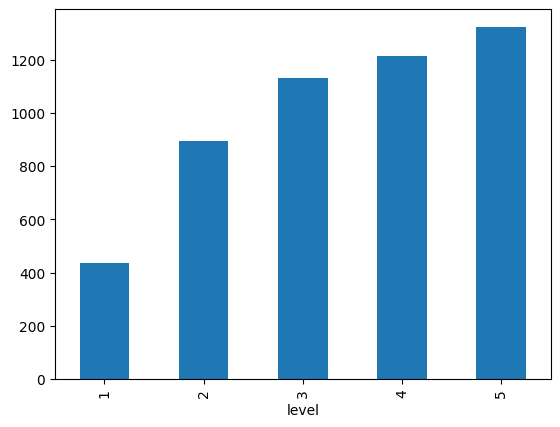

In [ ]:
math_df["level"].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='level'>

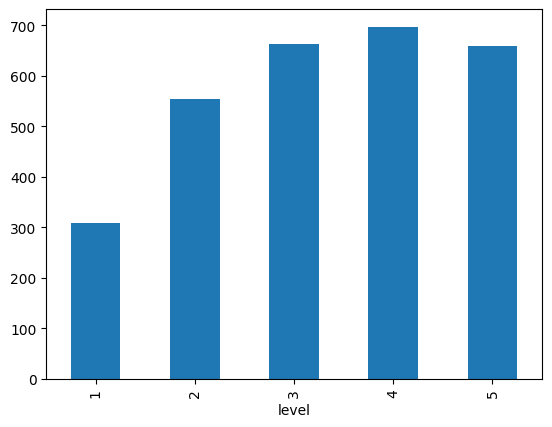

In [ ]:
int_ans_math_df["level"].value_counts().sort_index().plot(kind="bar")

In [ ]:
non_neg_int_ans_math_df = int_ans_math_df[int_ans_math_df["ans"] >= 0]
non_neg_int_ans_math_df

,problem,level,type,solution,ans_str,is_ans_int,ans
0,How many vertical asymptotes does the graph of...,3,Algebra,The denominator of the rational function facto...,2,True,2
1,What is the positive difference between $120\%...,1,Algebra,One hundred twenty percent of 30 is $120\cdot3...,10,True,10
4,"If $2^8=4^x$, what is the value of $x$?",1,Algebra,Rewrite $4$ as $2^2$ to find $4^x=2^{2x}$. Si...,4,True,4
5,What is the 100th term of the arithmetic seque...,2,Algebra,"The common difference is $10 - 6 = 4$, so the ...",402,True,402
7,Mr. Madoff invests 1000 dollars in a fund that...,4,Algebra,Let $r$ be the annual interest rate. Then aft...,7,True,7
...,...,...,...,...,...,...,...
4987,Given $\|\mathbf{v}\| = 5$ and $\|\mathbf{w}\|...,3,Precalculus,Note that\n\begin{align*}\n\operatorname{proj}...,5,True,5
4989,If $0^\circ < x < 180^\circ$ and $\cos x + \si...,5,Precalculus,"From the given equation, $\cos x = \frac{1}{2}...",14,True,14
4990,"Let $x_1,$ $x_2,$ $x_3,$ $y_1,$ $y_2,$ and $y_...",5,Precalculus,"In general,\n\[\frac{1}{2} \begin{vmatrix} x_1...",144,True,144
4992,Compute\n\[\frac{1}{\cos^2 10^\circ} + \frac{1...,4,Precalculus,We can write\n\begin{align*}\n\frac{1}{\cos^2 ...,12,True,12


In [ ]:
hardest_non_neg_int_ans_math_df = non_neg_int_ans_math_df[int_ans_math_df["level"] >= 5]
hardest_non_neg_int_ans_math_df

,problem,level,type,solution,ans_str,is_ans_int,ans
20,Suppose the roots of the polynomial $x^2 - mx ...,5,Algebra,"Let $p$ and $q$ be the prime roots. Then, we k...",18,True,18
28,If $a$ and $b$ are the solutions to the equati...,5,Algebra,We can find the roots of this equation by usin...,5,True,5
32,John computes the sum of the elements of each ...,5,Algebra,"Among the two-element subsets of $\{1,2,3,4,5,...",105,True,105
38,"Let $(x,y)$ be an ordered pair of real numbers...",5,Algebra,"Moving all the terms to the left, we have the ...",49,True,49
54,"At a certain amusement park, there is a bulk d...",5,Algebra,Letting $t$ equal the number of tickets sold i...,69,True,69
...,...,...,...,...,...,...,...
4948,Let $\alpha$ and $\beta$ be angles for which\n...,5,Precalculus,Let $a = \tan^2 \alpha$ and $b = \tan^2 \beta....,8,True,8
4959,Let $t$ be the smallest positive real number f...,5,Precalculus,We have that\n\[\cos t = \cos \left( \frac{180...,6,True,6
4989,If $0^\circ < x < 180^\circ$ and $\cos x + \si...,5,Precalculus,"From the given equation, $\cos x = \frac{1}{2}...",14,True,14
4990,"Let $x_1,$ $x_2,$ $x_3,$ $y_1,$ $y_2,$ and $y_...",5,Precalculus,"In general,\n\[\frac{1}{2} \begin{vmatrix} x_1...",144,True,144


<Axes: xlabel='type'>

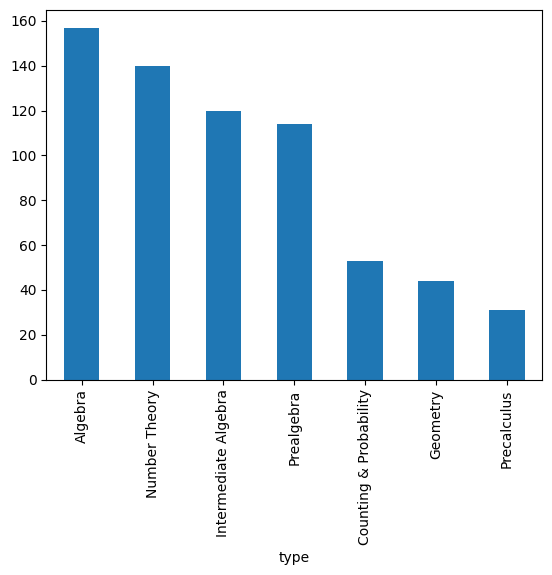

In [ ]:
hardest_non_neg_int_ans_math_df["type"].value_counts().plot(kind="bar")

In [ ]:
min_type_size = min(hardest_non_neg_int_ans_math_df["type"].value_counts().values)
min_type_size

31

## I.I.D


In [ ]:
iid_hardest_non_neg_int_ans_math_df = hardest_non_neg_int_ans_math_df.groupby(
    "type"
).sample(frac=0.23, random_state=42)
iid_hardest_non_neg_int_ans_math_df

,problem,level,type,solution,ans_str,is_ans_int,ans
970,For how many real values of $x$ is $\sqrt{63-\...,5,Algebra,Suppose that $k = \sqrt{63 - \sqrt{x}}$ is an...,8,True,8
360,Find the product of all positive integer value...,5,Algebra,"For a quadratic to have two real roots, the di...",24,True,24
1049,Define $f(x)=\frac{1+x}{1-x}$ and $g(x)=\frac{...,5,Algebra,Define a new function $h(x)$ so that $h(x)=g(f...,4,True,4
1066,The equation $x^2+18x=27$ has two solutions. T...,5,Algebra,"Completing the square, we add $(18/2)^2=81$ to...",117,True,117
867,"Two circles of radius 1 are centered at $(4,0)...",5,Algebra,"Let the center of the circle be $(a,b),$ and l...",4,True,4
...,...,...,...,...,...,...,...
4741,"Let $a$ and $b$ be two 12th roots of unity, no...",5,Precalculus,We can write\n\[(a + b)^{12} = b^{12} \left( 1...,7,True,7
4880,How many real numbers $x^{}_{}$ satisfy the eq...,5,Precalculus,The graphs of $y = \frac{1}{5} \log_2 x$ and $...,159,True,159
4819,"Let $\alpha,$ $\beta,$ and $\gamma$ be three r...",5,Precalculus,"Let $a = e^{i \alpha},$ $b = e^{i \beta},$ and...",12,True,12
4857,Find the smallest positive real number $C$ for...,5,Precalculus,Let $\bold{v} = \begin{pmatrix} x \\ y \end{pm...,4,True,4


In [ ]:
iid_hardest_non_neg_int_ans_math_df = iid_hardest_non_neg_int_ans_math_df.rename(
    {
        "problem": "query",
        "ans": "ref_ans",
        "type": "domain",
        "solution": "ref_resp",
    },
    axis=1,
)
iid_hardest_non_neg_int_ans_math_df

,query,level,domain,ref_resp,ans_str,is_ans_int,ref_ans
970,For how many real values of $x$ is $\sqrt{63-\...,5,Algebra,Suppose that $k = \sqrt{63 - \sqrt{x}}$ is an...,8,True,8
360,Find the product of all positive integer value...,5,Algebra,"For a quadratic to have two real roots, the di...",24,True,24
1049,Define $f(x)=\frac{1+x}{1-x}$ and $g(x)=\frac{...,5,Algebra,Define a new function $h(x)$ so that $h(x)=g(f...,4,True,4
1066,The equation $x^2+18x=27$ has two solutions. T...,5,Algebra,"Completing the square, we add $(18/2)^2=81$ to...",117,True,117
867,"Two circles of radius 1 are centered at $(4,0)...",5,Algebra,"Let the center of the circle be $(a,b),$ and l...",4,True,4
...,...,...,...,...,...,...,...
4741,"Let $a$ and $b$ be two 12th roots of unity, no...",5,Precalculus,We can write\n\[(a + b)^{12} = b^{12} \left( 1...,7,True,7
4880,How many real numbers $x^{}_{}$ satisfy the eq...,5,Precalculus,The graphs of $y = \frac{1}{5} \log_2 x$ and $...,159,True,159
4819,"Let $\alpha,$ $\beta,$ and $\gamma$ be three r...",5,Precalculus,"Let $a = e^{i \alpha},$ $b = e^{i \beta},$ and...",12,True,12
4857,Find the smallest positive real number $C$ for...,5,Precalculus,Let $\bold{v} = \begin{pmatrix} x \\ y \end{pm...,4,True,4


In [ ]:
iid_hardest_non_neg_int_ans_math_df[
    ["domain", "level", "ref_ans", "query", "ref_resp"]
].sample(frac=1, random_state=42).to_json(
    "../data/iid_hardest_non_neg_int_ans_math.json", orient="records", indent=2
)

## Balanced


In [ ]:
balanced_hardest_non_neg_int_ans_math_df = hardest_non_neg_int_ans_math_df.groupby(
    "type"
).head(10)
balanced_hardest_non_neg_int_ans_math_df

,problem,level,type,solution,ans_str,is_ans_int,ans
20,Suppose the roots of the polynomial $x^2 - mx ...,5,Algebra,"Let $p$ and $q$ be the prime roots. Then, we k...",18,True,18
28,If $a$ and $b$ are the solutions to the equati...,5,Algebra,We can find the roots of this equation by usin...,5,True,5
32,John computes the sum of the elements of each ...,5,Algebra,"Among the two-element subsets of $\{1,2,3,4,5,...",105,True,105
38,"Let $(x,y)$ be an ordered pair of real numbers...",5,Algebra,"Moving all the terms to the left, we have the ...",49,True,49
54,"At a certain amusement park, there is a bulk d...",5,Algebra,Letting $t$ equal the number of tickets sold i...,69,True,69
...,...,...,...,...,...,...,...
4529,An angle $x$ is chosen at random from the inte...,5,Precalculus,Because $\cos(90^{\circ}-x)=\sin x$ and $\sin(...,92,True,92
4532,"For some positive integer $n,$ $0 < n < 180,$\...",5,Precalculus,Note that\n\begin{align*}\n\cot x - \cot 2x &=...,82,True,82
4535,One line is defined by\n\[\begin{pmatrix} 3 \\...,5,Precalculus,"We see that $(3,-10,1)$ is a point on the firs...",7,True,7
4544,"For a given constant $b > 10,$ there are two p...",5,Precalculus,We have that\n\[\cos^2 B = 1 - \sin^2 B = \fra...,16,True,16


In [ ]:
balanced_hardest_non_neg_int_ans_math_df

,problem,level,type,solution,ans_str,is_ans_int,ans
20,Suppose the roots of the polynomial $x^2 - mx ...,5,Algebra,"Let $p$ and $q$ be the prime roots. Then, we k...",18,True,18
28,If $a$ and $b$ are the solutions to the equati...,5,Algebra,We can find the roots of this equation by usin...,5,True,5
32,John computes the sum of the elements of each ...,5,Algebra,"Among the two-element subsets of $\{1,2,3,4,5,...",105,True,105
38,"Let $(x,y)$ be an ordered pair of real numbers...",5,Algebra,"Moving all the terms to the left, we have the ...",49,True,49
54,"At a certain amusement park, there is a bulk d...",5,Algebra,Letting $t$ equal the number of tickets sold i...,69,True,69
...,...,...,...,...,...,...,...
4529,An angle $x$ is chosen at random from the inte...,5,Precalculus,Because $\cos(90^{\circ}-x)=\sin x$ and $\sin(...,92,True,92
4532,"For some positive integer $n,$ $0 < n < 180,$\...",5,Precalculus,Note that\n\begin{align*}\n\cot x - \cot 2x &=...,82,True,82
4535,One line is defined by\n\[\begin{pmatrix} 3 \\...,5,Precalculus,"We see that $(3,-10,1)$ is a point on the firs...",7,True,7
4544,"For a given constant $b > 10,$ there are two p...",5,Precalculus,We have that\n\[\cos^2 B = 1 - \sin^2 B = \fra...,16,True,16


In [ ]:
balanced_hardest_non_neg_int_ans_math_df = (
    balanced_hardest_non_neg_int_ans_math_df.rename(
        {
            "problem": "query",
            "ans": "ref_ans",
            "type": "domain",
            "solution": "ref_resp",
        },
        axis=1,
    )
)
balanced_hardest_non_neg_int_ans_math_df

,query,level,domain,ref_resp,ans_str,is_ans_int,ref_ans
20,Suppose the roots of the polynomial $x^2 - mx ...,5,Algebra,"Let $p$ and $q$ be the prime roots. Then, we k...",18,True,18
28,If $a$ and $b$ are the solutions to the equati...,5,Algebra,We can find the roots of this equation by usin...,5,True,5
32,John computes the sum of the elements of each ...,5,Algebra,"Among the two-element subsets of $\{1,2,3,4,5,...",105,True,105
38,"Let $(x,y)$ be an ordered pair of real numbers...",5,Algebra,"Moving all the terms to the left, we have the ...",49,True,49
54,"At a certain amusement park, there is a bulk d...",5,Algebra,Letting $t$ equal the number of tickets sold i...,69,True,69
...,...,...,...,...,...,...,...
4529,An angle $x$ is chosen at random from the inte...,5,Precalculus,Because $\cos(90^{\circ}-x)=\sin x$ and $\sin(...,92,True,92
4532,"For some positive integer $n,$ $0 < n < 180,$\...",5,Precalculus,Note that\n\begin{align*}\n\cot x - \cot 2x &=...,82,True,82
4535,One line is defined by\n\[\begin{pmatrix} 3 \\...,5,Precalculus,"We see that $(3,-10,1)$ is a point on the firs...",7,True,7
4544,"For a given constant $b > 10,$ there are two p...",5,Precalculus,We have that\n\[\cos^2 B = 1 - \sin^2 B = \fra...,16,True,16


In [ ]:
balanced_hardest_non_neg_int_ans_math_df[
    ["domain", "level", "ref_ans", "query", "ref_resp"]
].sample(frac=1, random_state=42).to_json(
    "../data/balanced_hardest_non_neg_int_ans_math.json", orient="records", indent=2
)